In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv('processed/442100110323_hourly.csv')
df

,READ_DATE,KWH_EXP
0,2019-01-01 00:00:00,2.402650
1,2019-01-01 01:00:00,2.408348
2,2019-01-01 02:00:00,2.406840
3,2019-01-01 03:00:00,2.256511
4,2019-01-01 04:00:00,2.065598
...,...,...
47467,2024-05-31 19:00:00,65.205495
47468,2024-05-31 20:00:00,65.520523
47469,2024-05-31 21:00:00,66.389436
47470,2024-05-31 22:00:00,69.132420


In [31]:
# ADF test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['KWH_EXP'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.341408
p-value: 0.158960
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Berdasarkan hasil ADF test, p-value (0.158960) lebih besar dari 0.05 dan ADF Statistic (-2.341408) lebih besar dari critical value pada tingkat signifikansi 5% (-2.862). Ini berarti kita gagal menolak hipotesis nol, sehingga time series df['KWH_EXP'] kemungkinan besar tidak stasioner.

In [32]:
# KPSS test
from statsmodels.tsa.stattools import kpss

result = kpss(df['KWH_EXP'])
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))


KPSS Statistic: 0.484825
p-value: 0.045084
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


Berdasarkan hasil KPSS test, p-value (0.045084) lebih kecil dari 0.05 dan KPSS Statistic (0.484825) lebih besar dari critical value pada tingkat signifikansi 5% (0.463). Ini berarti kita menolak hipotesis nol, sehingga time series df['KWH_EXP'] kemungkinan besar tidak stasioner.

Dukungan visualisasi untuk melihat ketidak stasioneran data

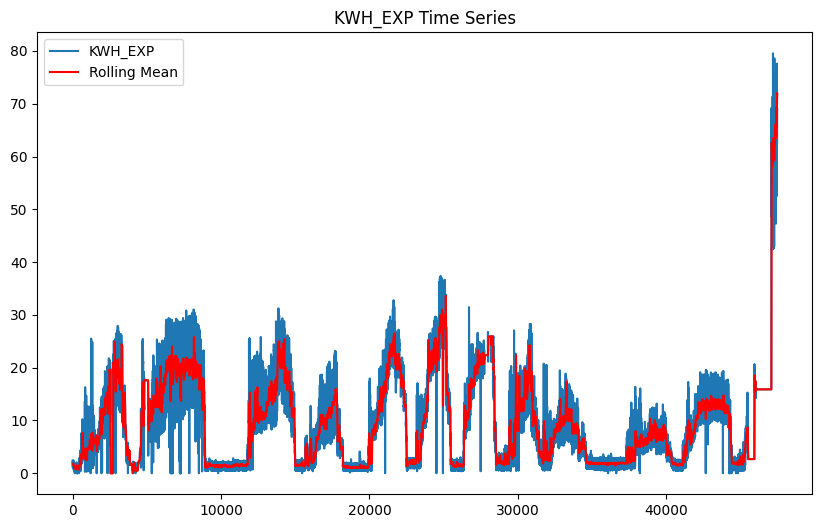

In [72]:
# simple moving avarage untuk identifikasi trend dan seasonality
rolling_mean = df['KWH_EXP'].rolling(window=24).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['KWH_EXP'], label='KWH_EXP')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.legend(loc='best')
plt.title('KWH_EXP Time Series')
plt.show()


Cek tren di timeframe yang lebih tinggi supaya lebih terlihat

Text(0.5, 1.0, 'KWH_EXP Weekly Time Series')

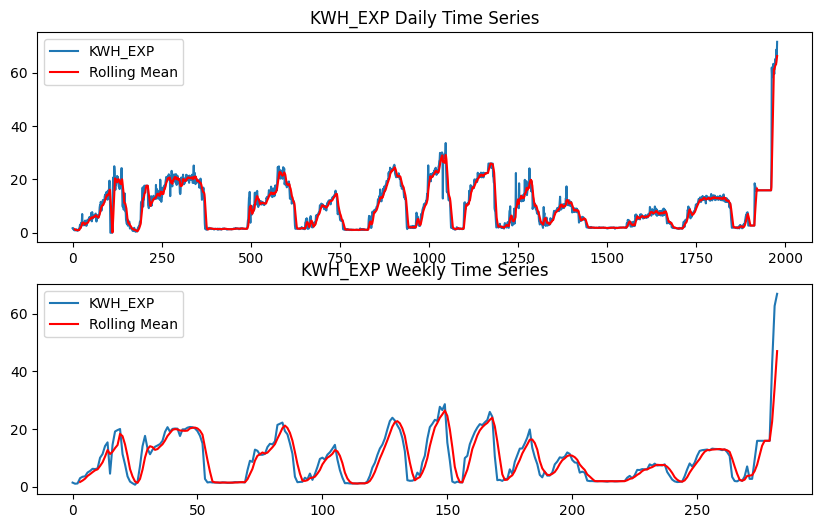

In [70]:
df_daily = pd.read_csv('processed/442100110323_daily.csv')
df_weekly = pd.read_csv('processed/442100110323_weekly.csv')

rolling_mean_daily = df_daily['KWH_EXP'].rolling(window=7).mean()
rolling_mean_week = df_weekly['KWH_EXP'].rolling(window=4).mean()

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(df_daily['KWH_EXP'], label='KWH_EXP')
ax[0].plot(rolling_mean_daily, label='Rolling Mean', color='red')
ax[0].legend(loc='best')
ax[0].set_title('KWH_EXP Daily Time Series')

ax[1].plot(df_weekly['KWH_EXP'], label='KWH_EXP')
ax[1].plot(rolling_mean_week, label='Rolling Mean', color='red')
ax[1].legend(loc='best')
ax[1].set_title('KWH_EXP Weekly Time Series')


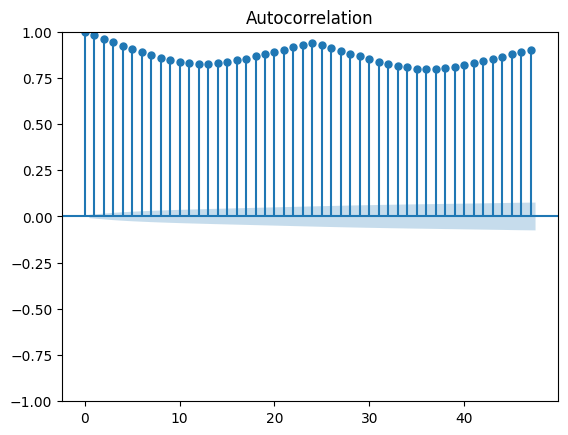

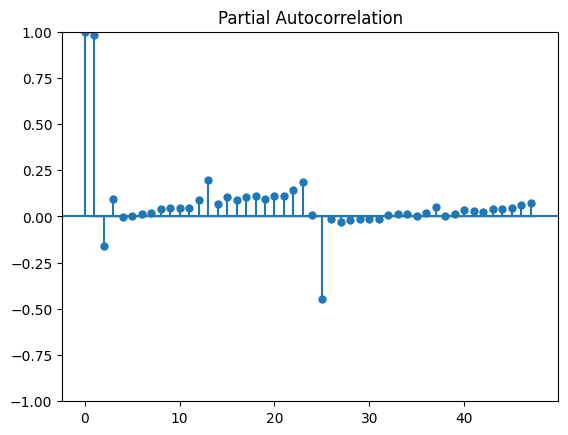

In [23]:
# plot acf dan pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['KWH_EXP'])
plt.show()
plot_pacf(df['KWH_EXP'])
plt.show()

* Pola ACF tidak mengalami penurunan / decay yang signifikan, termasuk ciri-ciri stasioner. 
* Pola bergelombang pada ACF juga menunjukkan adanya komponen musiman pada data
* Terdapat lag yang signifikan di titik 1 dan 2 pada plot PACF

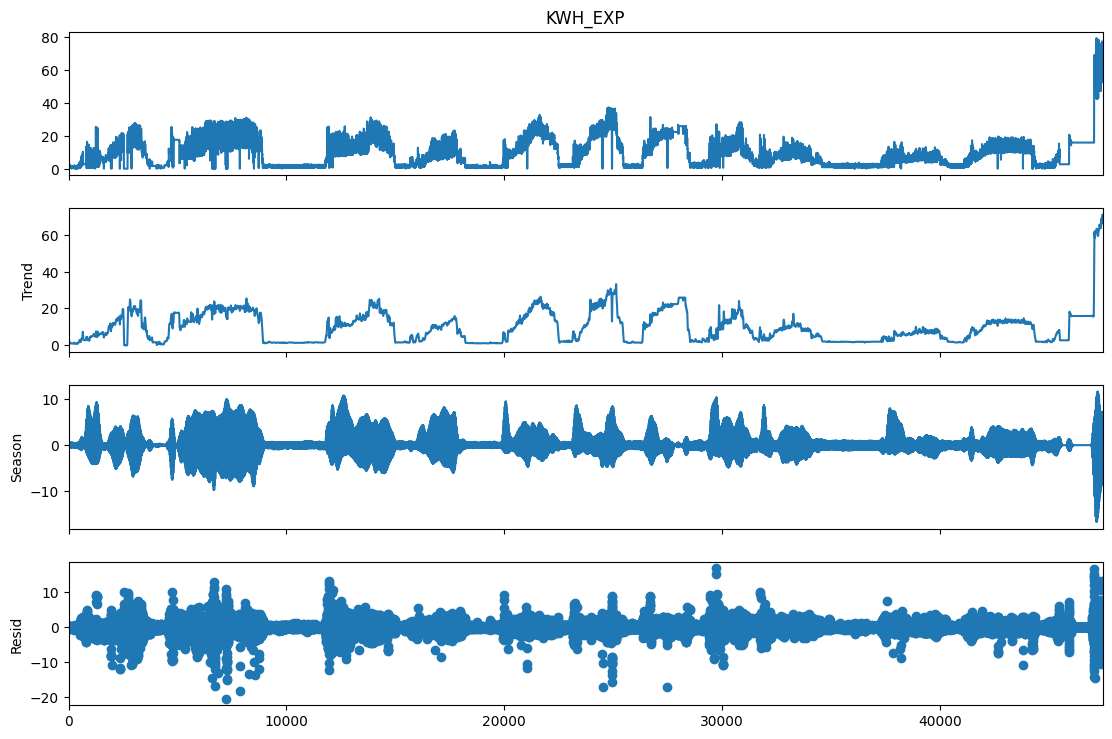

In [73]:
# Seasonal and Trend decomposition using LOESS (STL)
from statsmodels.tsa.seasonal import STL

stl = STL(df['KWH_EXP'], seasonal=13, period=24) 
res = stl.fit()

fig = res.plot()
fig.set_size_inches(12, 8)
plt.show()


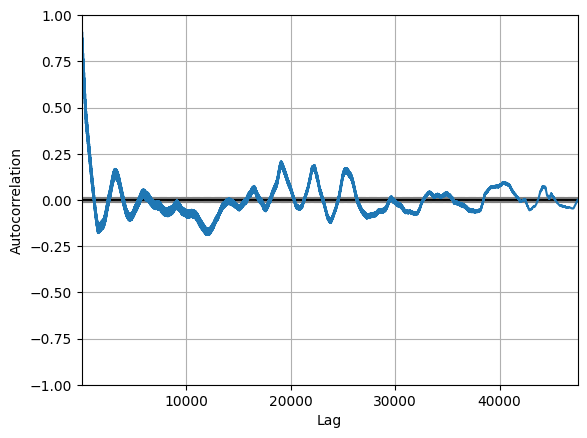

In [71]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['KWH_EXP'])
plt.show()